In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def clip_noise_schedule(alphas2, clip_value=0.001):
    """
    For a noise schedule given by alpha^2, this clips alpha_t / alpha_t-1.
    This may help improve stability during
    sampling.
    """
    alphas2 = np.concatenate([np.ones(1), alphas2], axis=0)


    alphas_step = (alphas2[1:] / alphas2[:-1])

    alphas_step = np.clip(alphas_step, a_min=clip_value, a_max=1.)
    alphas2 = np.cumprod(alphas_step, axis=0)


    return alphas2

def polynomial_schedule(timesteps: int, s=5.0e-4, power=2., clip_value=0.001):
    """
    A noise schedule based on a simple polynomial equation: 1 - x^power.
    """
    steps = timesteps + 1
    x = np.linspace(0, steps, steps)
    alphas2 = (1 - np.power(x / steps, power))**2

    if clip_value is not None:
        alphas2 = clip_noise_schedule(alphas2, clip_value=clip_value)

    precision = 1 - 2 * s

    alphas2 = precision * alphas2 + s

    return alphas2

In [35]:
sns.set_style("whitegrid")  # Options include "whitegrid", "darkgrid", "white", "dark", and "ticks"

# Step 3: Configure Font and Sizes
font = {
    'family': 'serif',    # Use a serif font (more suitable for scientific papers)
    'weight': 'normal',   # Normal weight
    'size': 15            # General font size, can be adjusted as needed
}
plt.rc('font', **font)

# Update specific font sizes
plt.rc('axes', titlesize=14)   # Title font size
plt.rc('axes', labelsize=12)   # X and Y label font size
plt.rc('xtick', labelsize=10)  # X-axis tick label font size
plt.rc('ytick', labelsize=10)  # Y-axis tick label font size
plt.rc('legend', fontsize=12)  # Legend font size
plt.rc('figure', titlesize=14) # Figure title font size

# Step 4: Additional Plot Adjustments
plt.rc('lines', linewidth=1.5)  # Line width
plt.rc('axes', linewidth=0.75)  # Axes line width

# Optional: Set a larger figure size for better readability in papers
plt.rc('figure', figsize=(8, 6))

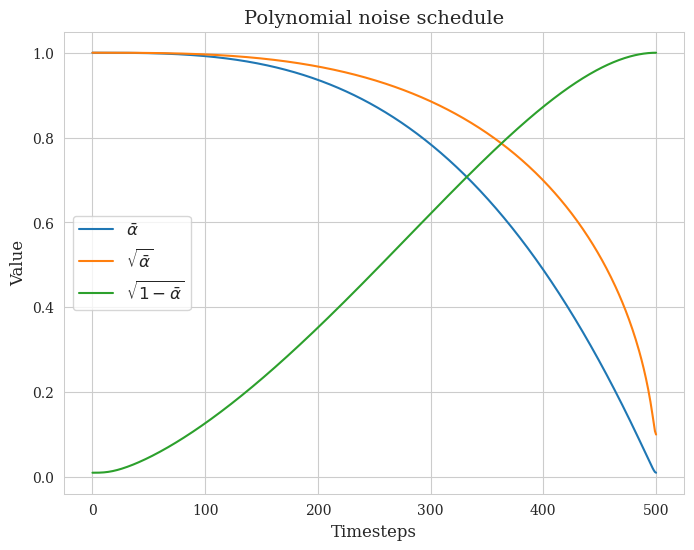

In [40]:
a2 = polynomial_schedule(500)
a = np.sqrt(a2)
# a = a2
fig, ax = plt.subplots()
sns.lineplot(x=range(len(a)), y=a, ax=ax, label=r"$\bar{\alpha}$")
sns.lineplot(x=range(len(a)), y=np.sqrt(a), ax=ax, label=r"$\sqrt{\bar{\alpha}}$")
sns.lineplot(x=range(len(a)), y=np.sqrt(1-a2), ax=ax, label=r"$\sqrt{1-\bar{\alpha}}$")
# sns.lineplot(x=range(len(a)), y=a, ax=ax)
ax.set_title("Polynomial noise schedule")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
plt.savefig("plots/polynomial_noise_schedule.pdf")

In [37]:
a[-10:], np.sqrt(a)[-10:]

(array([0.05396318, 0.04827839, 0.04260092, 0.03694526, 0.03133645,
        0.02582115, 0.02049555, 0.01558279, 0.01165543, 0.01000179]),
 array([0.23229976, 0.21972343, 0.20639989, 0.19221151, 0.17702104,
        0.16068961, 0.14316265, 0.12483104, 0.10796032, 0.10000896]))